# Home Credit Default Risk

### Loading the data

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import featuretools as ft
import featuretools.variable_types as vtypes
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [2]:
datapath = 'home-credit-default-risk/data'

In [3]:
app_train = pd.read_csv(datapath + r'/application_train.csv')
app_test = pd.read_csv(datapath + r'/application_test.csv')

In [4]:
# loading data
bureau = pd.read_csv(datapath + r'/bureau.csv')
bureau_balance = pd.read_csv(datapath + r'/bureau_balance.csv')
credit_card_balance = pd.read_csv(datapath + r'/credit_card_balance.csv')
payments = pd.read_csv(datapath + r'/installments_payments.csv')
psb = pd.read_csv(datapath + r'/POS_CASH_balance.csv')
prev_app = pd.read_csv(datapath + r'/previous_application.csv')

In [5]:
print(app_train.shape[0])
print(app_test.shape[0])

307511
48744


## Data pre-processing

Before merging all the datasets we have, we want to perform some data pre-processing, such as handling missing values or handling categorical variables, such that when we proceed with the feature engineering process the data is already cleaned.

### Analyzing the app_train dataset

In [6]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Here is the distribution of the **TARGET** label.

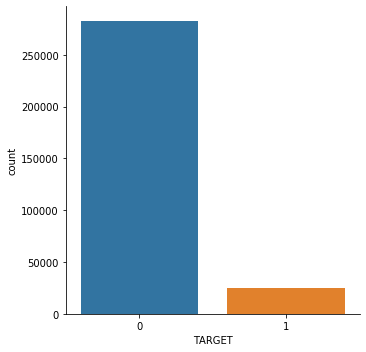

In [8]:
sns.catplot(x='TARGET', kind='count', data=app_train)

As we can see the data we have for the training is **unbalanced**, this means that most of the data points have a certain TARGET label, in our case 0.

In [9]:
round((app_train['TARGET']==0).sum()*100/app_train.shape[0], 2)

91.93

More than 91% of the people don't get a loan.

In [10]:
datasets = [app_train, app_test, bureau, bureau_balance, credit_card_balance, payments, psb, prev_app]

### Analyzing single features

The next step consists in analyzing the features present in the dataset and cleaning eventual anomalies.

#### CODE_GENDER

In [14]:
app_train['CODE_GENDER'].describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

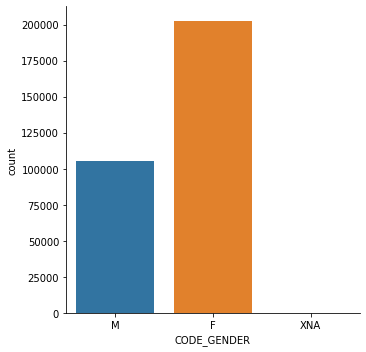

In [15]:
sns.catplot(x='CODE_GENDER', kind='count', data=app_train)

In [16]:
sum(app_train['CODE_GENDER']=='XNA')

4

As we can see there are 4 clients with no gender.

In [17]:
app_train.loc[app_train['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'

In [18]:
sum(app_train['CODE_GENDER']=='XNA')

0

#### CNT_CHILDREN

In [19]:
app_train['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

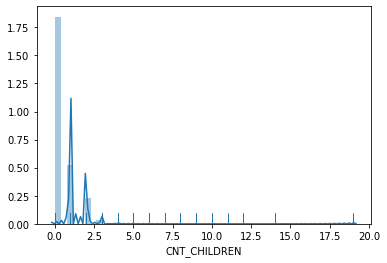

In [20]:
sns.distplot(app_train['CNT_CHILDREN'], rug=True)

In [21]:
# checking outliers
q = app_train['CNT_CHILDREN'].quantile(.99)
print(q)
print("There are ", (app_train['CNT_CHILDREN'] > q).sum(), " clients with more than ", int(q), "children")

3.0
There are  555  clients with more than  3 children


In [22]:
app_train[app_train['CNT_CHILDREN'] > 10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
34545,140032,1,Cash loans,M,Y,N,11,315000.0,1007761.5,38515.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
80948,193853,0,Cash loans,F,N,Y,12,337500.0,746280.0,59094.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
171125,298322,0,Revolving loans,F,N,Y,12,225000.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
176011,303956,0,Cash loans,M,Y,Y,14,225000.0,1085058.0,55530.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
183878,313127,0,Cash loans,F,Y,N,14,45000.0,810000.0,23814.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
267998,410527,0,Cash loans,F,N,N,14,54000.0,604152.0,25596.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


Since the outliers seem to be quite a lot and the maximum value is not an exagerate number, we will keep them as they are.

#### NAME_TYPE_SUITE

In [23]:
app_train['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

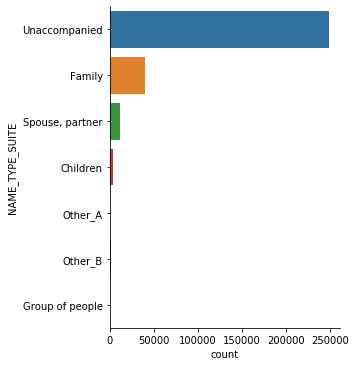

In [24]:
sns.catplot(y='NAME_TYPE_SUITE', kind='count', data=app_train)

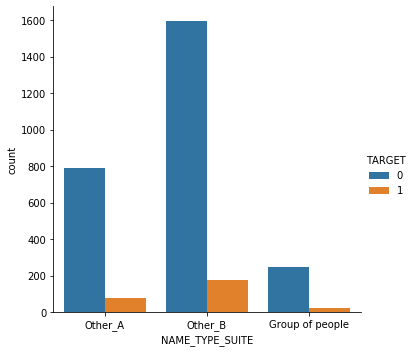

In [25]:
sns.catplot(x='NAME_TYPE_SUITE', data=app_train.loc[app_train['NAME_TYPE_SUITE'].isin(['Other_A', 'Other_B', 'Group of people'])] , kind='count', hue='TARGET')

In [26]:
cat = app_train['NAME_TYPE_SUITE'].value_counts()[:3].index.tolist()
app_train.loc[~app_train['NAME_TYPE_SUITE'].isin(cat), 'NAME_TYPE_SUITE'] = 'Other'
app_test.loc[~app_test['NAME_TYPE_SUITE'].isin(cat), 'NAME_TYPE_SUITE'] = 'Other'

In [27]:
app_train['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Other'],
      dtype=object)

#### DAYS_EMPLOYED

In [28]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

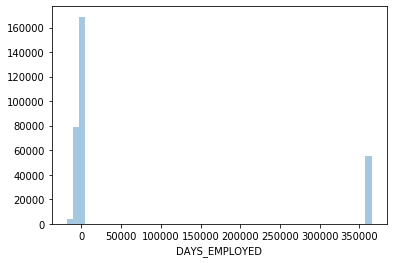

In [29]:
sns.distplot(app_train['DAYS_EMPLOYED'], kde=False)

In [30]:
sum(app_train['DAYS_EMPLOYED']>0)

55374

As we can see, there are a lot of row where the value in DAYS_EMPLOYED is over 1000 years. We are going to substitute that value with NaN values, since we do not know what they actually represent and substituting with the median could be an error. We will also create a new column to keep track of the values we converted.

In [31]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] > 0
# do the same for the test set
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] > 0

In [32]:
app_train.loc[app_train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = np.nan
app_test.loc[app_test['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = np.nan

Here it is the new distribution

C:\Users\paolo\Anaconda3\envs\data_science\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\paolo\Anaconda3\envs\data_science\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


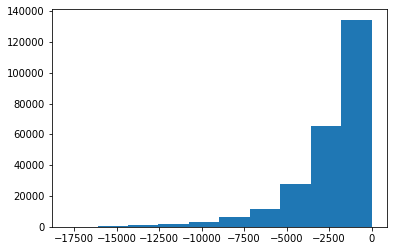

In [33]:
plt.hist(data=app_train, x='DAYS_EMPLOYED')
plt.show()

#### Columns to drop

Looking at the distribution of the columns on kaggle, there are a lot of them with 100% distribution on a single value. This type of features doesn't give any type of information to any model, so it is more useful to drop them.

In [34]:
cols_to_drop = ['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'REG_REGION_NOT_LIVE_REGION', 
                'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5']
app_train.drop(columns=cols_to_drop, inplace=True)
app_test.drop(columns=cols_to_drop, inplace=True)

#### OCCUPATION_TYPE

In [35]:
app_train['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

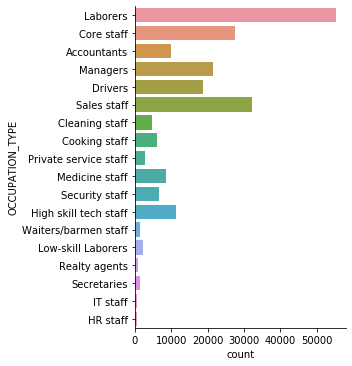

In [36]:
sns.catplot(y='OCCUPATION_TYPE', kind='count', data=app_train)

In [37]:
count = app_train['OCCUPATION_TYPE'].isna().sum()
print("Missing values are {}. {}% of the total.".format(count, round(count/app_train.shape[0], 3)))

Missing values are 96391. 0.313% of the total.


In [38]:
app_train.loc[app_train['OCCUPATION_TYPE'].isna(), ['OCCUPATION_TYPE']] = 'Other'
app_test.loc[app_test['OCCUPATION_TYPE'].isna(), ['OCCUPATION_TYPE']] = 'Other'

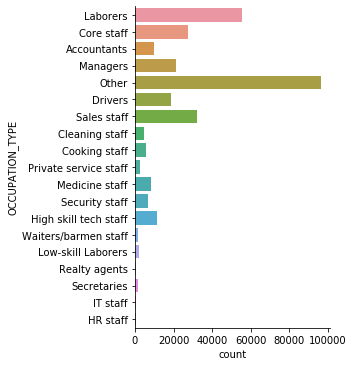

In [39]:
sns.catplot(y='OCCUPATION_TYPE', kind='count', data=app_train)

#### WALLSMATERIAL_MODE

In [40]:
app_train['WALLSMATERIAL_MODE'].describe()

count     151170
unique         7
top        Panel
freq       66040
Name: WALLSMATERIAL_MODE, dtype: object

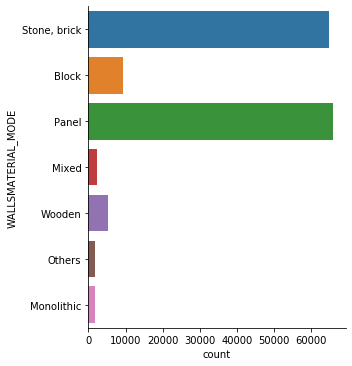

In [41]:
sns.catplot(y='WALLSMATERIAL_MODE', kind='count', data=app_train)

In [42]:
app_train['WALLSMATERIAL_MODE'].isna().sum()

156341

In [43]:
app_train.loc[app_train['WALLSMATERIAL_MODE'].isna(), 'WALLSMATERIAL_MODE'] = 'Others'
app_test.loc[app_test['WALLSMATERIAL_MODE'].isna(), 'WALLSMATERIAL_MODE'] = 'Others'

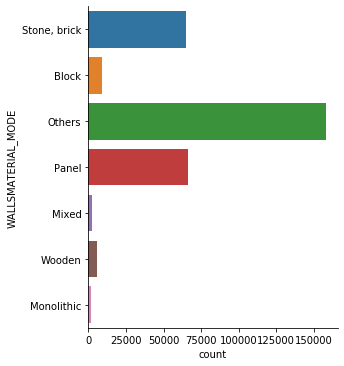

In [44]:
sns.catplot(y='WALLSMATERIAL_MODE', kind='count', data=app_train)

## Categorical features and Label encoding

Let's see how many features in the dataset are categorical, that means that are not integers or floats.

In [45]:
def get_cat_features(df):
    cat_features = {}
    for col in df.columns:
        if df[col].dtype == object:
            cat_features[col] = df[col].nunique()

    cat_features = pd.DataFrame.from_dict(cat_features, columns=['classes'], orient='index')
    return cat_features

In [46]:
cat_features_train = get_cat_features(app_train)
cat_features_train

,classes
NAME_CONTRACT_TYPE,2
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,4
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,19


The same analysis can be performed on the test dataset.

In [47]:
cat_features_test = get_cat_features(app_test)
cat_features_test

,classes
NAME_CONTRACT_TYPE,2
CODE_GENDER,2
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,4
NAME_INCOME_TYPE,7
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,5
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,19


In [48]:
set(cat_features_test.index == cat_features_train.index)

{True}

As we can see the train and the test dataset have the same variables, but with different number of classes.

In [49]:
print("There are %d categorical variables" % len(cat_features_train))

There are 16 categorical variables


Now we need to convert all the categorical features into numbers, otherwise most models won't be able to deal with them.  
We have 2 ways to do it:
1. via **Label Encoding**: encoding each class into an integer
2. via **one-hot Encoding**: each class will be converted into a new column in the dataframe.

The first method is useful only when a variable has 1 or 2 classes but it is not good for encoding variables with more classes.

So, first thing, we are going to convert each variable with max 2 classes through Label Encoding.

In [50]:
LE = LabelEncoder()

In [51]:
def label_encoding(df, cat_features):
    for index, row in cat_features.iterrows():
        if row[0] <= 2:
            df[index] = LE.fit_transform(df[index].to_list())

In [52]:
label_encoding(app_train, cat_features_train)
label_encoding(app_test, cat_features_test)

In [53]:
print("There are %d categorical variables in app_train" % len(get_cat_features(app_train)))
print("There are %d categorical variables in app_test" % len(get_cat_features(app_test)))

There are 11 categorical variables in app_train
There are 11 categorical variables in app_test


For the categorical variable with more tha 2 classes we are going to perform, instead, one-hot encoding using the **pd.get_dummies()** function.

In [54]:
app_train = pd.get_dummies(app_train, drop_first=True, dummy_na=True)
app_test = pd.get_dummies(app_test, drop_first=True, dummy_na=True)

The *drop_first=True* attribute drops one column for each categorical feature to avoid multicollinearity; while with *dummy_na=True* we create a new column to indicate the rows with NaN values since this information can be useful to the model.

In [55]:
print("There are %d categorical variables in app_train" % len(get_cat_features(app_train)))
print("There are %d categorical variables in app_test" % len(get_cat_features(app_test)))

There are 0 categorical variables in app_train
There are 0 categorical variables in app_test


In [56]:
print(app_train.shape)
print(app_test.shape)

(307511, 233)
(48744, 230)


Now the train and test datasets have different number of columns due to the encoding, so we need to keep just the common columns between the 2 dataframes.

In [57]:
cat1 = set(app_train.columns)
cat2 = set(app_test.columns)
inter = cat2.difference(cat1)
inter

set()

In [58]:
# we need to keep the target column since we will need it for the training
target = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
app_train['TARGET'] = target

In [59]:
print(app_train.shape)
print(app_test.shape)

(307511, 231)
(48744, 230)


## Merging train and test

From now on, we will want to modify app_train and app_test together. For this reason it is useful to merge them. But first we need to create a column to distinguish them.

In [60]:
app_train['train'] = 1
app_test['train'] = 0
# we also need to add the TARGET column to data_test
app_test['TARGET'] = np.nan

In [61]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,TARGET,train
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,0,1,1
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,1
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,1,0,0,1,0,0,0,0,0,1
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,1,0,0,1,0,0,0,0,0,1
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,1,0,0,1,0,0,0,0,0,1


In [62]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_nan,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,train,TARGET
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0,1,0,0,0,NaN
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,1,0,0,1,0,0,0,0,0,NaN
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,1,0,0,1,0,0,0,0,0,NaN
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,1,0,0,0,0,NaN
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,1,0,0,1,0,0,0,0,0,NaN


In [63]:
app = app_train.append(app_test, ignore_index=False, sort=True)
app.shape

(356255, 232)

### Analyzing installments_payments dataset

In [64]:
payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


Just by taking a look at the *describe* table we can see that everything is fine with this dataset, so we can move on analyzing another one.

### Analyzing credit_card_balance dataset

In [65]:
credit_card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [66]:
credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].describe()

count    3.090496e+06
mean     5.961325e+03
std      2.822569e+04
min     -6.827310e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.115000e+06
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: float64

C:\Users\paolo\Anaconda3\envs\data_science\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\paolo\Anaconda3\envs\data_science\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


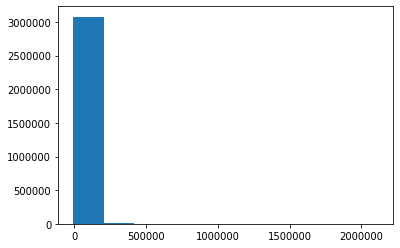

In [67]:
plt.hist(data=credit_card_balance, x='AMT_DRAWINGS_ATM_CURRENT')
plt.show()

In [68]:
sum(credit_card_balance['AMT_DRAWINGS_ATM_CURRENT']==0.0)

2665718

### Analyzing bureau_balance dataset

In [69]:
bureau_balance = pd.read_csv(datapath + r'/bureau_balance.csv')

In [70]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


### Analyzing bureau dataset

In [71]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [72]:
bureau['CREDIT_CURRENCY'].describe()

count        1716428
unique             4
top       currency 1
freq         1715020
Name: CREDIT_CURRENCY, dtype: object

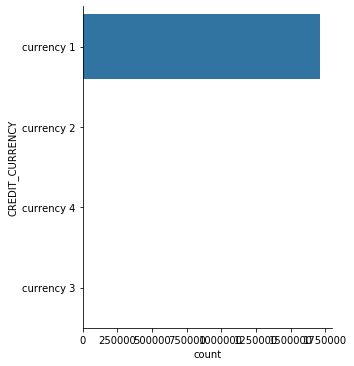

In [73]:
sns.catplot(y='CREDIT_CURRENCY', kind='count', data=bureau)
plt.show()

### Analyzing previous_application dataset

In [74]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
days_cols = [col for col in prev_app.columns if 'DAYS' in col]
prev_app[days_cols].describe()

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,-8.806797e+02,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,7.790997e+02,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729
min,-2.922000e+03,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,-1.300000e+03,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,-5.810000e+02,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,-2.800000e+02,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,-1.000000e+00,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [76]:
days_cols.remove('DAYS_DECISION')

In [77]:
for col in days_cols:
    prev_app[col].replace(365243, np.nan, inplace=True)

In [78]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

#### FLAG_LAST_APPL_PER_CONTRACT

In [79]:
prev_app['FLAG_LAST_APPL_PER_CONTRACT'].unique()

array(['Y', 'N'], dtype=object)

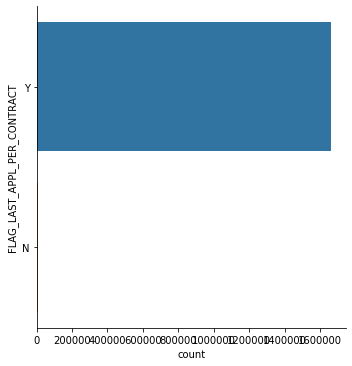

In [80]:
sns.catplot(y='FLAG_LAST_APPL_PER_CONTRACT', kind='count', data=prev_app)

In [81]:
prev_app[prev_app['FLAG_LAST_APPL_PER_CONTRACT']=='Y'].shape[0]/prev_app.shape[0]

0.9949257999274345

In [82]:
prev_app.drop(columns='FLAG_LAST_APPL_PER_CONTRACT', inplace=True)

#### NFLAG_LAST_APPL_IN_DAY

In [83]:
prev_app['NFLAG_LAST_APPL_IN_DAY'].unique()

array([1, 0], dtype=int64)

In [84]:
prev_app[prev_app['NFLAG_LAST_APPL_IN_DAY']==0].shape[0]/prev_app.shape[0]

0.0035324814664468144

In [85]:
prev_app.drop(columns='NFLAG_LAST_APPL_IN_DAY', inplace=True)

#### NAME_CASH_LOAN_PURPOSE

In [86]:
prev_app['NAME_CASH_LOAN_PURPOSE'].describe()

count     1670214
unique         25
top           XAP
freq       922661
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

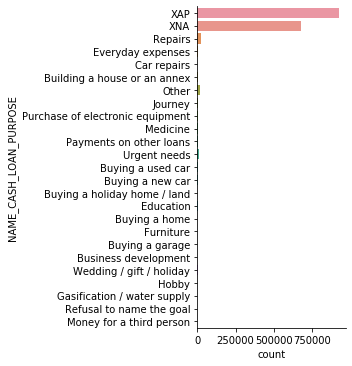

In [87]:
sns.catplot(y='NAME_CASH_LOAN_PURPOSE', kind='count', data=prev_app)

In [88]:
cat = prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts()
cat = cat[cat > 1000].index.tolist()
prev_app.loc[~prev_app['NAME_CASH_LOAN_PURPOSE'].isin(cat), 'NAME_CASH_LOAN_PURPOSE'] = 'Other'

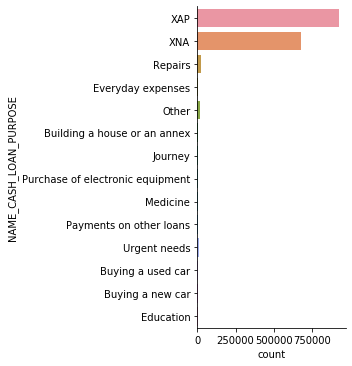

In [89]:
sns.catplot(y='NAME_CASH_LOAN_PURPOSE', kind='count', data=prev_app)

#### DAYS_DECISION

In [90]:
prev_app['DAYS_DECISION'].describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

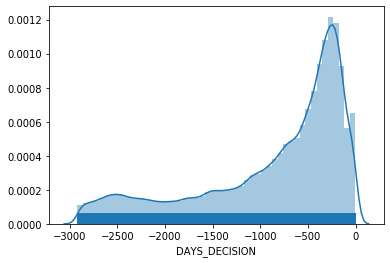

In [91]:
sns.distplot(prev_app['DAYS_DECISION'], rug=True)

#### NAME_TYPE_SUITE 

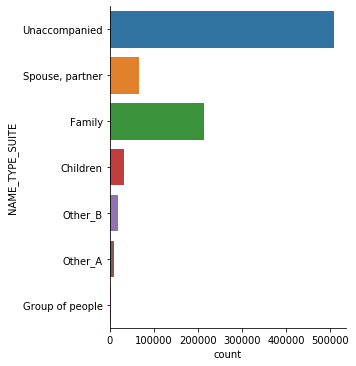

In [92]:
sns.catplot(y='NAME_TYPE_SUITE', kind='count', data=prev_app)

In [93]:
cat = prev_app['NAME_TYPE_SUITE'].value_counts()
cat

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [94]:
prev_app.loc[prev_app['NAME_TYPE_SUITE']=='Other_B', 'NAME_TYPE_SUITE'] = 'Other'
prev_app.loc[prev_app['NAME_TYPE_SUITE']=='Other_A', 'NAME_TYPE_SUITE'] = 'Other'
prev_app.loc[prev_app['NAME_TYPE_SUITE']=='Group of people', 'NAME_TYPE_SUITE'] = 'Other'

#### NAME_GOODS_CATEGORY

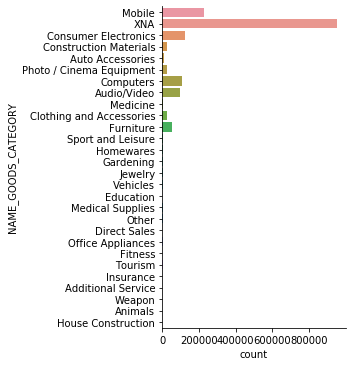

In [95]:
sns.catplot(y='NAME_GOODS_CATEGORY', kind='count', data=prev_app)

In [96]:
cat = prev_app['NAME_GOODS_CATEGORY'].value_counts()
cat = cat[cat > 1000].index.tolist()
prev_app.loc[~prev_app['NAME_GOODS_CATEGORY'].isin(cat), 'NAME_GOODS_CATEGORY'] = 'Other'

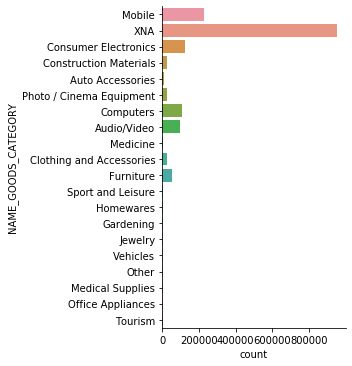

In [97]:
sns.catplot(y='NAME_GOODS_CATEGORY', kind='count', data=prev_app)

#### SELLERPLACE_AREA

In [98]:
prev_app['SELLERPLACE_AREA'].head()

0    35
1    -1
2    -1
3    -1
4    -1
Name: SELLERPLACE_AREA, dtype: int64

In [99]:
prev_app[prev_app['SELLERPLACE_AREA']==-1].shape[0]

762675

In [100]:
prev_app[prev_app['SELLERPLACE_AREA']!=-1].shape[0]

907539

In [101]:
prev_app.drop(columns='SELLERPLACE_AREA', inplace=True)

### Analyzing POS_CASH_balance dataset

In [102]:
psb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## Merging all datasets with *featuretools*

In [103]:
# creating a new entityset
es = ft.EntitySet(id = 'clients')

In [108]:
cat_fts = list(get_cat_features(bureau).index)
vt_b = dict(zip(cat_fts, [vtypes.Categorical for i in range(len(cat_fts))]))

cat_fts = list(get_cat_features(bureau_balance).index)
vt_bb = dict(zip(cat_fts, [vtypes.Categorical for i in range(len(cat_fts))]))

cat_fts = list(get_cat_features(credit_card_balance).index)
vt_cc = dict(zip(cat_fts, [vtypes.Categorical for i in range(len(cat_fts))]))

cat_fts = list(get_cat_features(prev_app).index)
vt_prev = dict(zip(cat_fts, [vtypes.Categorical for i in range(len(cat_fts))]))

cat_fts = list(get_cat_features(psb).index)
vt_psb = dict(zip(cat_fts, [vtypes.Categorical for i in range(len(cat_fts))]))

cat_fts = list(get_cat_features(payments).index)
vt_pay = dict(zip(cat_fts, [vtypes.Categorical for i in range(len(cat_fts))]))

#### Creating entities

In [112]:
es = es.entity_from_dataframe(entity_id='clients', dataframe=app, index='SK_ID_CURR')

In [113]:
es = es.entity_from_dataframe(entity_id='bureau', dataframe=bureau, index='SK_ID_BUREAU', variable_types=vt_b)

In [114]:
es = es.entity_from_dataframe(entity_id='bureau_balance', dataframe=bureau_balance,
                             make_index=True, index='BB_ID', variable_types=vt_bb)

In [115]:
es = es.entity_from_dataframe(entity_id='cc_balance', dataframe=credit_card_balance, 
                              make_index=True, index='CC_BALANCE_ID', variable_types=vt_cc)

In [116]:
es = es.entity_from_dataframe(entity_id='prev_app', dataframe=prev_app, index='SK_ID_PREV', variable_types=vt_prev)

In [117]:
es = es.entity_from_dataframe(entity_id='pos_cash_balance', dataframe=psb, 
                              make_index=True, index='BALANCE_ID', variable_types=vt_psb)

In [118]:
es = es.entity_from_dataframe(entity_id='payments', dataframe=payments, 
                              make_index=True, index='PAYMENT_ID', variable_types=vt_pay)

#### Creating relationships between entities

In [119]:
bureau_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['bureau']['SK_ID_CURR'])
cc_balance_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['cc_balance']['SK_ID_CURR'])
bureau_balance_r = ft.Relationship(es['bureau']['SK_ID_BUREAU'],
                          es['bureau_balance']['SK_ID_BUREAU'])
prev_app_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['prev_app']['SK_ID_CURR'])
pos_cash_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['pos_cash_balance']['SK_ID_CURR'])
payments_r = ft.Relationship(es['clients']['SK_ID_CURR'],
                          es['payments']['SK_ID_CURR'])

In [120]:
es = es.add_relationships([bureau_r, bureau_balance_r, cc_balance_r, prev_app_r, pos_cash_r, payments_r])

In [121]:
es

Entityset: clients
  Entities:
    clients [Rows: 356255, Columns: 232]
    bureau [Rows: 1716428, Columns: 17]
    bureau_balance [Rows: 27299925, Columns: 4]
    cc_balance [Rows: 3840312, Columns: 24]
    prev_app [Rows: 1670214, Columns: 32]
    pos_cash_balance [Rows: 10001358, Columns: 9]
    payments [Rows: 13605401, Columns: 9]
  Relationships:
    bureau.SK_ID_CURR -> clients.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    cc_balance.SK_ID_CURR -> clients.SK_ID_CURR
    prev_app.SK_ID_CURR -> clients.SK_ID_CURR
    pos_cash_balance.SK_ID_CURR -> clients.SK_ID_CURR
    payments.SK_ID_CURR -> clients.SK_ID_CURR

#### Choosing feature primitives

Before perfoming the deep feature synthesis (**dfs**) we need to evaluate and choose the feature primitives to utilize both for single tables (**transformations**) and for merging (**aggregations**).  
Specifically, in our case we are going to use just some trasformations, because we want to keep the feature engineering process manual. So, let's take a look at the options that *feature tools* offers.

In [122]:
primitives = ft.list_primitives()
primitives[primitives['type']=='aggregation']

,name,type,description
0,time_since_first,aggregation,Calculates the time elapsed since the first da...
1,first,aggregation,Determines the first value in a list.
2,any,aggregation,Determines if any value is 'True' in a list.
3,last,aggregation,Determines the last value in a list.
4,median,aggregation,Determines the middlemost number in a list of ...
5,mode,aggregation,Determines the most commonly repeated value.
6,min,aggregation,"Calculates the smallest value, ignoring `NaN` ..."
7,count,aggregation,"Determines the total number of values, excludi..."
8,std,aggregation,Computes the dispersion relative to the mean v...
9,all,aggregation,Calculates if all values are 'True' in a list.


In our case we want to keep the number of features as low as possible, due to low computing power, but at the same time we want those features to have the highest possible statistical meaning. Thus, we are going to aggregate the tables using:
- **median**: for numerical features
- **mode**: for ex-categorical features

### Merging the datasets through dfs

In [123]:
merged_df, feature_names = ft.dfs(entityset = es, target_entity = 'clients', 
                                 agg_primitives = ['median', 'mean', 'mode', 'count'],
                                 verbose=True)

Built 417 features
Elapsed: 1:12:45 | Progress: 100%|█████████████████████████████████████████████████████████████████████████████████████


In [124]:
merged_df.to_csv(datapath + r'/merged.csv')

In [125]:
feature_names

[<Feature: AMT_ANNUITY>,
 <Feature: AMT_CREDIT>,
 <Feature: AMT_GOODS_PRICE>,
 <Feature: AMT_INCOME_TOTAL>,
 <Feature: AMT_REQ_CREDIT_BUREAU_DAY>,
 <Feature: AMT_REQ_CREDIT_BUREAU_HOUR>,
 <Feature: AMT_REQ_CREDIT_BUREAU_MON>,
 <Feature: AMT_REQ_CREDIT_BUREAU_QRT>,
 <Feature: AMT_REQ_CREDIT_BUREAU_WEEK>,
 <Feature: AMT_REQ_CREDIT_BUREAU_YEAR>,
 <Feature: APARTMENTS_AVG>,
 <Feature: APARTMENTS_MEDI>,
 <Feature: APARTMENTS_MODE>,
 <Feature: BASEMENTAREA_AVG>,
 <Feature: BASEMENTAREA_MEDI>,
 <Feature: BASEMENTAREA_MODE>,
 <Feature: CNT_CHILDREN>,
 <Feature: CNT_FAM_MEMBERS>,
 <Feature: CODE_GENDER>,
 <Feature: COMMONAREA_AVG>,
 <Feature: COMMONAREA_MEDI>,
 <Feature: COMMONAREA_MODE>,
 <Feature: DAYS_BIRTH>,
 <Feature: DAYS_EMPLOYED>,
 <Feature: DAYS_EMPLOYED_ANOM>,
 <Feature: DAYS_ID_PUBLISH>,
 <Feature: DAYS_LAST_PHONE_CHANGE>,
 <Feature: DAYS_REGISTRATION>,
 <Feature: DEF_30_CNT_SOCIAL_CIRCLE>,
 <Feature: DEF_60_CNT_SOCIAL_CIRCLE>,
 <Feature: ELEVATORS_AVG>,
 <Feature: ELEVATORS_MEDI>,
 

In [126]:
merged_df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,MEAN(bureau_balance.bureau.DAYS_CREDIT),MEAN(bureau_balance.bureau.AMT_CREDIT_SUM_DEBT),MEAN(bureau_balance.bureau.CNT_CREDIT_PROLONG),MEAN(bureau_balance.bureau.CREDIT_DAY_OVERDUE),MEAN(bureau_balance.bureau.AMT_CREDIT_SUM_OVERDUE),MEAN(bureau_balance.bureau.DAYS_ENDDATE_FACT),MODE(bureau_balance.bureau.CREDIT_ACTIVE),MODE(bureau_balance.bureau.CREDIT_TYPE),MODE(bureau_balance.bureau.SK_ID_CURR),MODE(bureau_balance.bureau.CREDIT_CURRENCY)
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-996.781818,70223.142857,0.0,0.0,0.0,-808.4,Closed,Credit card,100002.0,currency 1
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# merged_df = pd.read_csv(datapath + r'/merged.csv')

## Feature selection

### Inspecting missing values

One of the first things to do during the data engineering and cleaning process is to check the missing values in the dataset and the relative amount and percentages.

In [129]:
def check_missing_values(df):
    cols = df.columns
    nan_df = pd.DataFrame(columns=['n_nan', 'perc_nan'])
    
    for col in cols:
        n_nan = pd.isna(df[col]).sum()
        perc = round((n_nan / df.shape[0])*100, 2)
        s = pd.Series({'n_nan': n_nan, 'perc_nan': perc} ,name=col)
        nan_df = nan_df.append(s)
        
    return nan_df.sort_values(by=['n_nan'], ascending=False)

In [130]:
check_missing_values(merged_df)

,n_nan,perc_nan
MEDIAN(prev_app.DAYS_FIRST_DRAWING),293752.0,82.46
MEAN(prev_app.DAYS_FIRST_DRAWING),293752.0,82.46
MEAN(cc_balance.AMT_PAYMENT_CURRENT),284135.0,79.76
MEDIAN(cc_balance.AMT_PAYMENT_CURRENT),284135.0,79.76
MEDIAN(cc_balance.CNT_DRAWINGS_OTHER_CURRENT),284061.0,79.74
...,...,...
OCCUPATION_TYPE_Low-skill Laborers,0.0,0.00
OCCUPATION_TYPE_Laborers,0.0,0.00
OCCUPATION_TYPE_IT staff,0.0,0.00
OCCUPATION_TYPE_High skill tech staff,0.0,0.00


For the merged dataset we are going to check the missing values and remove the columns with an high percentage of Nan, 75% in this case.

In [131]:
# check the number of missing values for each column
nan_values = check_missing_values(merged_df)
# drop the columns with a percentage of missing values over 75%
cols_to_drop = list(nan_values[nan_values['perc_nan']>=75].index)
merged_df.drop(columns=cols_to_drop, inplace=True)

## Feature engineering

### Obtaining new features

In [132]:
merged_df['DAYS_EMPLOYED_PERC'] = merged_df['DAYS_EMPLOYED'] / merged_df['DAYS_BIRTH']
# (referred to row above) In percentage, how much time in his life the client has been employed
merged_df['YEARLY_PAYMENT'] = merged_df['AMT_ANNUITY'] / merged_df['AMT_CREDIT']
# how much the client pays each year
merged_df['CREDIT_DURATION_years'] = merged_df['AMT_CREDIT']/merged_df['AMT_ANNUITY']
# how many years the credit lasts
merged_df['CREDIT_TO_INCOME'] = merged_df['AMT_CREDIT'] / merged_df['AMT_INCOME_TOTAL']
# explains the rapport between the credit request and the income of the client
merged_df['CREDIT_TO_VALUE'] = merged_df['AMT_CREDIT'] / merged_df['AMT_GOODS_PRICE']
# proportion of the credit compared to the total value of the goods for which the loan is given

In [133]:
# to be treated as categorical
merged_df['REGION_RATING_CLIENT'] = merged_df['REGION_RATING_CLIENT'].astype(str)
merged_df['REGION_RATING_CLIENT_W_CITY'] = merged_df['REGION_RATING_CLIENT_W_CITY'].astype(str)

#### Label encoding and One-hot encoding of categorical features

In [134]:
label_encoding(merged_df, get_cat_features(merged_df))

In [135]:
merged_df = pd.get_dummies(merged_df, drop_first=True, dummy_na=True)

In [136]:
print("Now the dataframe has", merged_df.shape[1], "features.")

Now the dataframe has 567 features.


And now adjusting the columns names to make them working when fitting the model

In [137]:
new_cols = {}
for col in merged_df.columns:
    if ':' in col:
        new_cols[col] = col.replace(':','_')

merged_df.rename(columns=new_cols, inplace=True)

In [138]:
merged_df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in merged_df.columns]

### Cross-correlation

In [139]:
ignore_variables = [col for col in merged_df.columns if 'SK_ID' in col]
useful_variables = [var for var in merged_df.columns if var not in ignore_variables]

In [140]:
# extracting train and test samples from the merged dataset
data_train = merged_df.loc[merged_df['train']==1, useful_variables]
data_train.drop(columns=['train'], inplace=True)
data_test = merged_df.loc[merged_df['train']==0, useful_variables]
data_test.drop(columns=['train'], inplace=True)
data_test.drop(columns=['TARGET'], inplace=True)

In [141]:
y = data_train['TARGET']

In [142]:
X = data_train.drop(columns=['TARGET'])

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model fitting

In [144]:
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test)

In [145]:
param = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 
          'learning_rate': 0.01, 'num_leaves': 90, 'num_iteration': 4000, 'verbose': 0 ,
          'colsample_bytree':.8, 'subsample':0.8, 'max_depth': 10, 'reg_alpha':.1, 'reg_lambda':.1, 
          'min_split_gain':.01, 'min_child_weight':1}

In [146]:
bst = lgb.train(param, train_data, valid_sets=[val_data], early_stopping_rounds=300, verbose_eval=200)

C:\Users\paolo\Anaconda3\envs\data_science\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 300 rounds
[200]	valid_0's auc: 0.764071
[400]	valid_0's auc: 0.776151
[600]	valid_0's auc: 0.782036
[800]	valid_0's auc: 0.784636
[1000]	valid_0's auc: 0.785832
[1200]	valid_0's auc: 0.786393
[1400]	valid_0's auc: 0.786644
[1600]	valid_0's auc: 0.786808
[1800]	valid_0's auc: 0.786804
[2000]	valid_0's auc: 0.786854
[2200]	valid_0's auc: 0.786963
[2400]	valid_0's auc: 0.786999
[2600]	valid_0's auc: 0.786938
Early stopping, best iteration is:
[2322]	valid_0's auc: 0.787072


In [147]:
bst.save_model('model.txt')

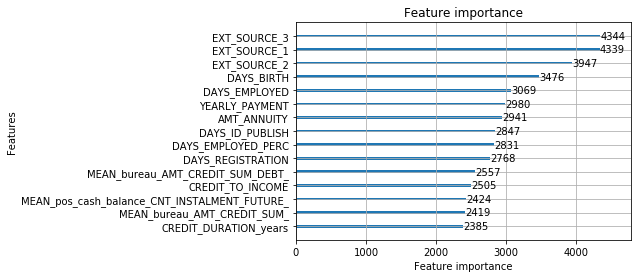

In [148]:
lgb.plot_importance(bst, max_num_features=15)

## Predict

In [152]:
preds = bst.predict(data_test, num_iteration=bst.best_iteration)

In [153]:
preds

array([0.02727355, 0.11009148, 0.01153816, ..., 0.01022031, 0.01916498,
       0.23832794])

In [154]:
results = pd.DataFrame()
results['SK_ID_CURR'] = data_test.index
results['TARGET'] = preds
results.to_csv(r'C:\Users\paolo\Documents\Data Science\FDS\home-credit-default-risk-FDS\home-credit-default-risk\preds\results.csv', index=False)